# Importing Libraries

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Data Collection and Preprocessing

In [17]:
df = pd.read_csv('spam_ham_dataset.csv')
print(df.head())

x = df['text']
y = df['label']

y = y.map({'ham': 0, 'spam': 1}) 

#Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


# Model Selection and Training

In [18]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])

#Train the model
pipeline.fit(x_train, y_train)
#Save the trained model for deployment
joblib.dump(pipeline, 'spam_classifier_model.pkl')

['spam_classifier_model.pkl']

In [19]:
#Model Testing
model = joblib.load('spam_classifier_model.pkl')

test_df = pd.read_csv('spam_ham_dataset.csv')  
print(test_df.head())

#Preprocess the test data
x_test_new = test_df['text']
y_test_new = test_df['label']
y_test_new = y_test_new.map({'ham': 0, 'spam': 1})

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


# Model Evaluation

In [20]:
y_pred = model.predict(X_test_new)
y_proba = model.predict_proba(X_test_new)[:, 1]

#Evaluation matrices
accuracy = accuracy_score(y_test_new, y_pred)
precision = precision_score(y_test_new, y_pred)
recall = recall_score(y_test_new, y_pred)
f1 = f1_score(y_test_new, y_pred)
roc_auc = roc_auc_score(y_test_new, y_proba)
conf_matrix = confusion_matrix(y_test_new, y_pred)

#Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.96
Precision: 1.00
Recall: 0.85
F1-Score: 0.92
AUC-ROC: 1.00


# Visualize

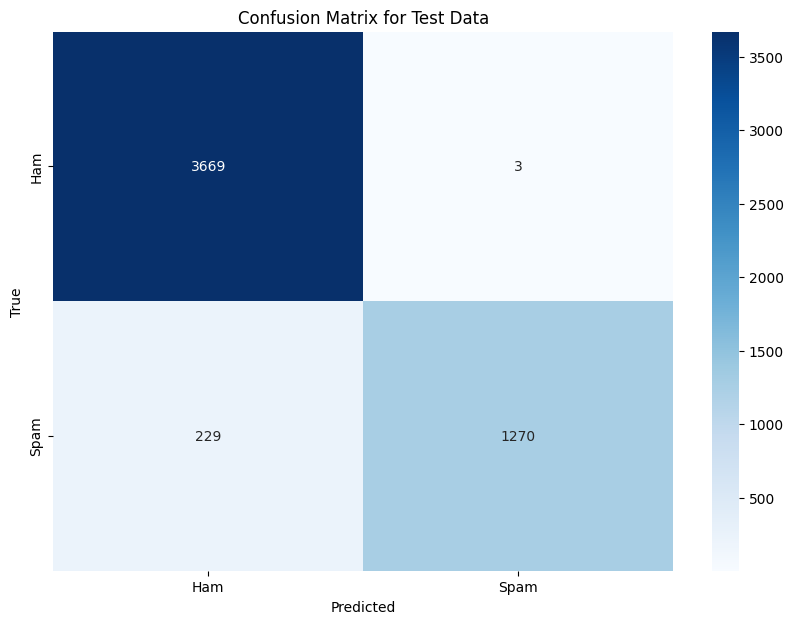

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Data')
plt.show()